# Percolation Model

흡수 모델(Percolation Model)은 격자 그래프에서 각 엣지가 존재할 확률이 p인 무작위 그래프를 생성하는 모델이다.

두 노드가 선으로 연결되어 있으면 그 노드 간에 선을 타고 액체가 이동할 수 있고, 연결되어 있지 않으면 이동할 수 없다. 그래서 특정 노드에 액체를 첨가하면 그 액체가 연결된 모든 노드로 흡수된다. 이러한 모델을 "흡수 모델"이라고 부른다.

Percolation Model을 구현하기 위해서 각 간선에 0~1까지의 랜덤한 값을 할당하고, p라는 랜덤 변수 하나를 선택하여 p보다 큰 값이 할당된 간선만 존재하게 하고, 그렇지 않은 간선은 넣지 않는 방법을 생각해볼 수 있다.  
이렇게 하면 전체 그래프는 p에 값에 따라 결정되고, 
$p_1 < p_2$이면 $G(p_1) \subseteq G(p_2)$  
라는 관계식이 성립하여 추후 연구에 편리하다.

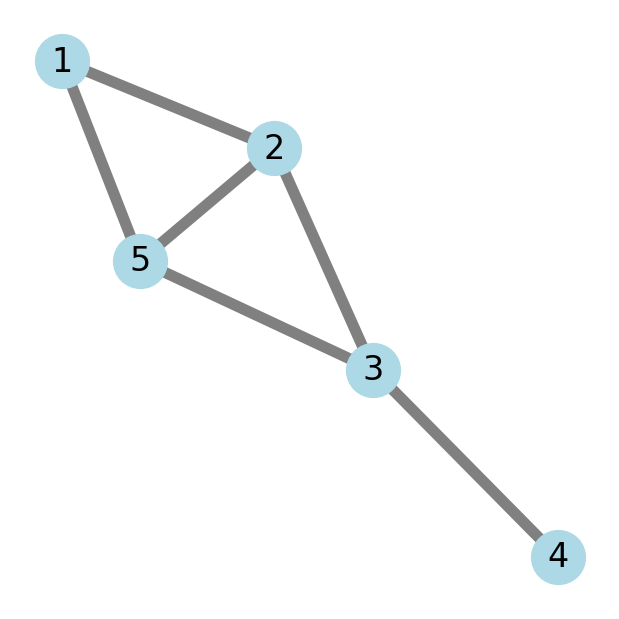

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# 작은 예제 그래프 (기존 전역 G를 덮어쓰지 않도록 이름을 바꿉니다)
G_small = nx.Graph()
G_small.add_nodes_from([1, 2, 3, 4, 5])
G_small.add_edges_from([(1, 2), (2, 3), (3, 4), (1, 5), (2, 5), (3, 5)])

pos_small = nx.spring_layout(G_small)
plt.figure(figsize=(6, 6))
nx.draw(
    G_small,
    pos_small,
    with_labels=True,
    node_color='lightblue',
    edge_color='gray',
    node_size=1500,
    width=8,
    font_size=24  # 노드 라벨 크기 조절
)
plt.show()

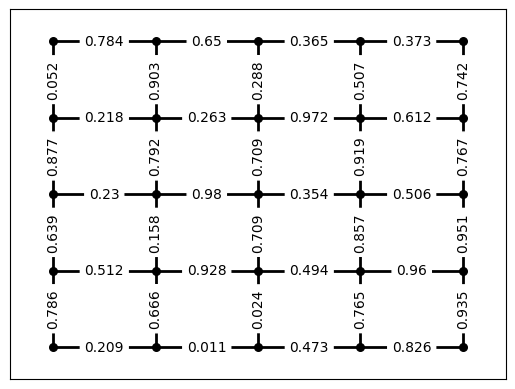

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# 그리드 그래프 생성
G = nx.grid_2d_graph(5,5)

# 간선마다 0~1 난수 할당
for u, v in G.edges():
    G[u][v]['w'] = round(random.random(), 3)

# 그래프 시각화
pos = {n: n for n in G.nodes()}

nx.draw_networkx_edges(G, pos, width=2, edge_color='black')
nx.draw_networkx_nodes(G, pos, node_size=30, node_color='black')

# 라벨 추가
edge_labels = {(u, v): G[u][v]['w'] for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.show()


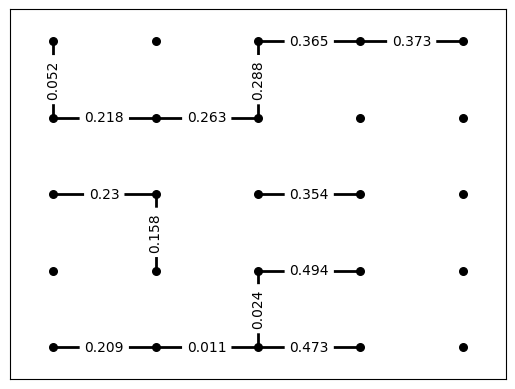

In [16]:
# 0.5 보다 작은 간선만 남기기, 라벨과 함께 시각화
H = nx.Graph()
H.add_nodes_from(G.nodes())
for u, v in G.edges():
    if G[u][v]['w'] < 0.5:
        H.add_edge(u, v, w=G[u][v]['w'])
pos_H = {n: n for n in H.nodes()}
nx.draw_networkx_edges(H, pos_H, width=2, edge_color='black')
nx.draw_networkx_nodes(H, pos_H, node_size=30, node_color='black')
edge_labels_H = {(u, v): H[u][v]['w'] for u, v in H.edges()}
nx.draw_networkx_edge_labels(H, pos_H, edge_labels=edge_labels_H, font_size=10)
plt.show()

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from ipywidgets import interact, FloatSlider
from IPython.display import clear_output

# 격자 크기
width = 20
G = nx.grid_2d_graph(width, width)

# 색상 생성 (RGB)
colors = [
    (random.random(), random.random(), random.random())
    for _ in range(width * width)
]

# 엣지 랜덤 weight 부여
for (u, v) in G.edges():
    G.edges[u, v]['weight'] = random.random()

# 노드 위치 고정
pos = {n: n for n in G.nodes()}
def draw_graph(p: float):
    clear_output(wait=True)
    plt.figure(figsize=(8, 8))

    # p 이하인 엣지만 선택
    edges = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] < p]

    # 부분 그래프 생성
    H = nx.Graph()
    H.add_edges_from(edges)

    # 엣지가 없는 노드도 포함
    nodes_in_edges = set([n for e in edges for n in e])
    isolated_nodes = [n for n in G.nodes() if n not in nodes_in_edges]
    H.add_nodes_from(isolated_nodes)

    # 연결 컴포넌트 추출
    components = list(nx.connected_components(H))

    # 컴포넌트별 색상 적용
    for i, comp in enumerate(components):
        sub_edges = [(u, v) for (u, v) in H.edges() if u in comp]
        edge_color = [colors[i % len(colors)]] * len(sub_edges)
        nx.draw_networkx_edges(H, pos, edgelist=sub_edges, width=2, edge_color=edge_color)
        nx.draw_networkx_nodes(H, pos, nodelist=list(comp), node_size=30,
                               node_color=[colors[i % len(colors)]] * len(comp))

    plt.xticks([])
    plt.yticks([])
    plt.title(f"p = {p:.2f}")
    plt.show()

interact(
    draw_graph,
    p=FloatSlider(min=0, max=1, step=0.01, value=0.5)
)


interactive(children=(FloatSlider(value=0.5, description='p', max=1.0, step=0.01), Output()), _dom_classes=('w…

<function __main__.draw_graph(p: float)>

그래프의 각 노드를 하나의 픽셀로 보고 렌더링 하면 아래와 같다.

In [18]:
from IPython.display import display, HTML

with open("index.html", "r", encoding="utf-8") as f:
    html_content = f.read()

display(HTML(html_content))

In [20]:
# 브라우저에서 "fractal-analysis.html" 파일 열기
import webbrowser
webbrowser.open_new_tab("fractal-analysis.html")



True